In [1]:
import os
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### 데이터 불러오기
* 2000개의 데이터
* 20개의 특성, 1개의 타겟.

In [2]:
INPUT_PATH = './data/'
train = pd.read_csv(os.path.join(INPUT_PATH, 'train.csv'))

train.shape

(2000, 21)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


##### 결측치

In [6]:
missing = train.isnull().sum()
missing

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

##### 타겟 분포
* 4개의 레이블로 구성.
* 각 레이블별로 500개씩 존재.

In [7]:
targets = train['price_range'].value_counts()
targets

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

<AxesSubplot:>

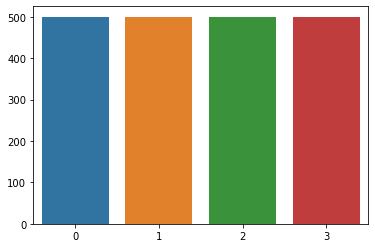

In [8]:
sns.barplot(x=targets.index, y=targets.values)

##### Correlation (상관관계)

In [9]:
corr = train.corr()['price_range']
corr

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [10]:
corr = corr.abs().sort_values(ascending=False)
corr

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
Name: price_range, dtype: float64

<AxesSubplot:>

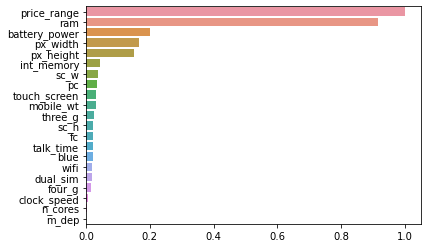

In [11]:
sns.barplot(x=corr.values, y=corr.index)

##### 특성값들의 분포
* 연속형 변수 분포

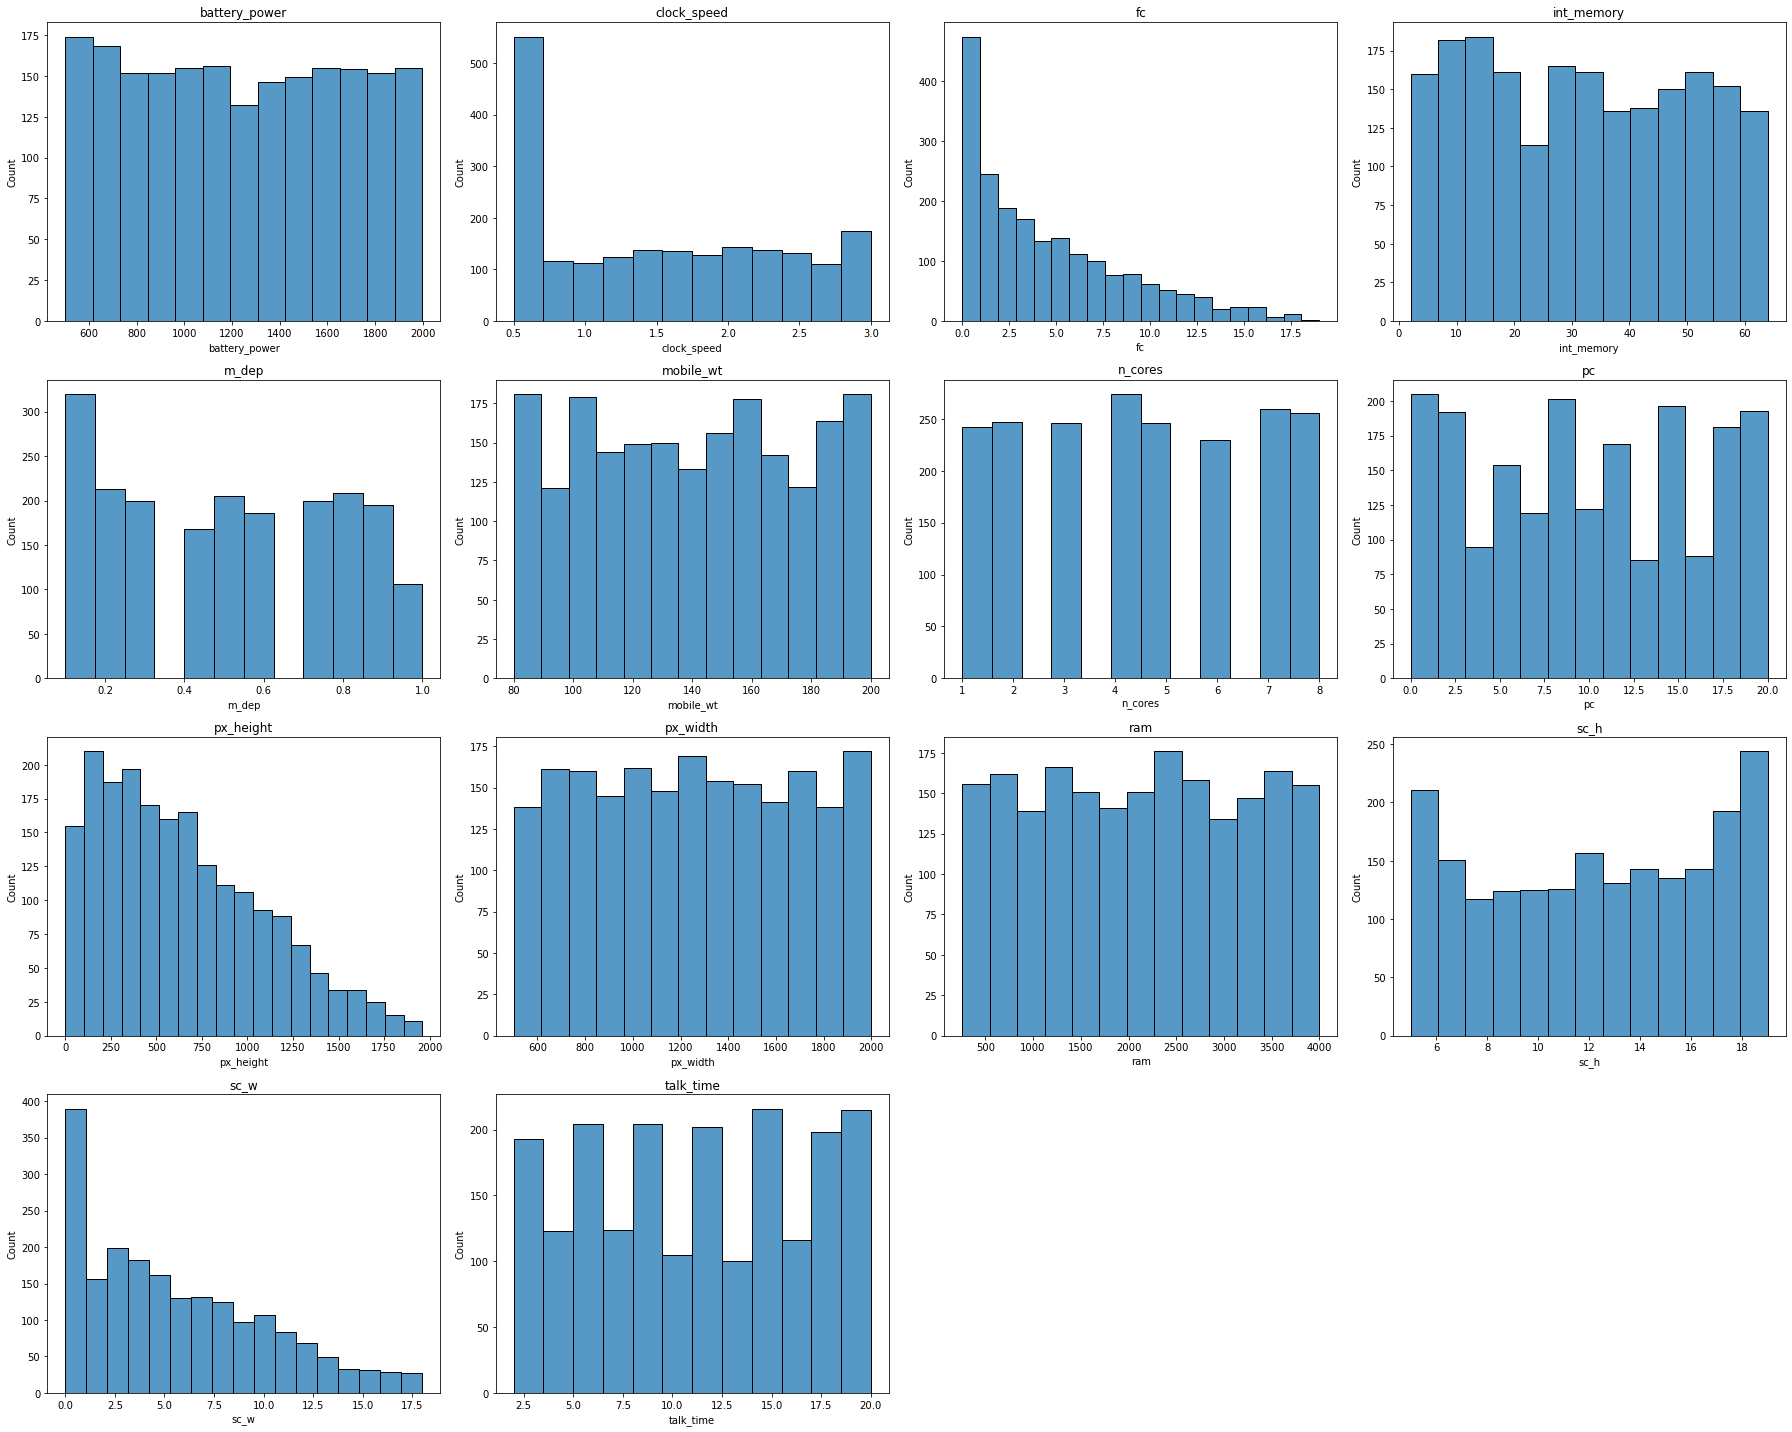

In [12]:
values = [
    'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
    'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
    'sc_h', 'sc_w', 'talk_time'
]

fig, axes = plt.subplots(4, 4, figsize=(25, 20))

for ax, col in zip(axes.ravel(), values):
    sns.histplot(train[col], ax=ax)
    ax.set_title(col)

axes = axes.ravel()
for i in range(len(values), 16):
    axes[i].set_visible(False)
plt.tight_layout()

* 범주형 변수 분포

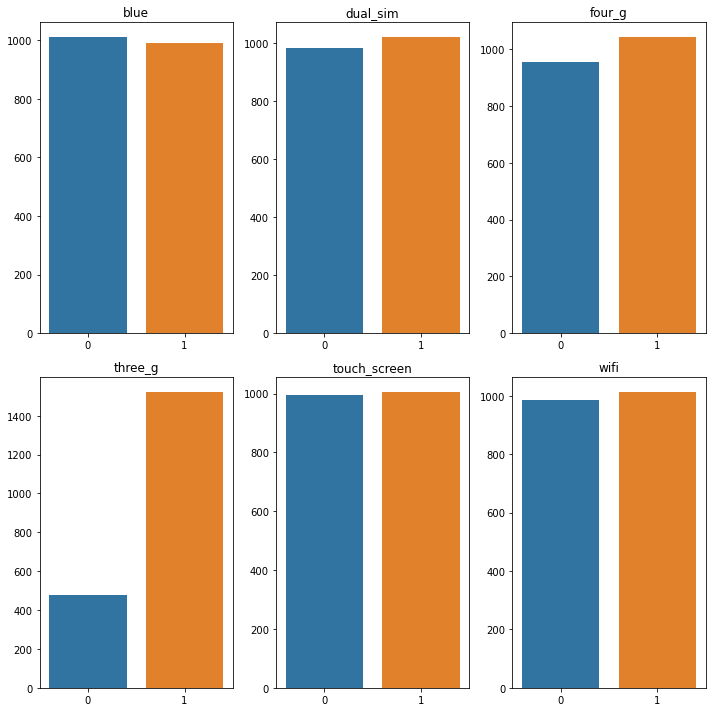

In [13]:
categories = [
    'blue', 'dual_sim', 'four_g', 'three_g',
    'touch_screen', 'wifi'
]

fig, axes = plt.subplots(2, 3, figsize=(10, 10))

for ax, col in zip(axes.ravel(), categories):
    counts = train[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=ax)
    ax.set_title(col)

axes = axes.ravel()
for i in range(len(categories), 6):
    axes[i].set_visible(False)
plt.tight_layout()

##### 클래스별 특성 분포
* ram이 클래스를 구분하기에 제일 적합해 보임.

In [14]:
prices = []
for i in range(4):
    prices.append(train.loc[train['price_range'] == i])

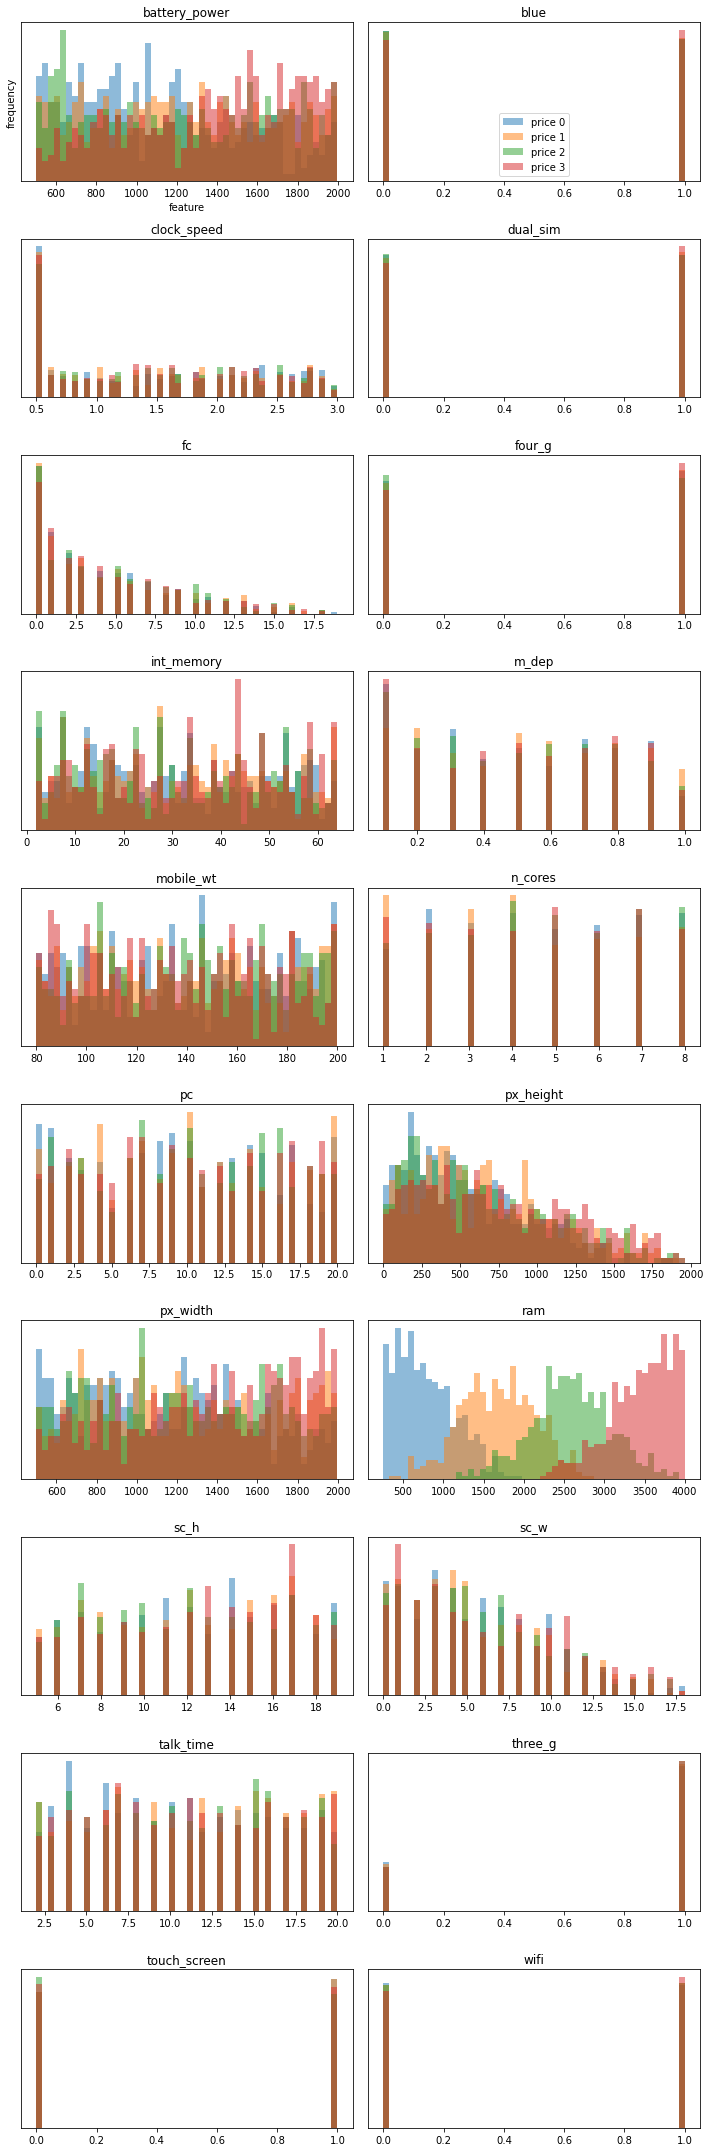

In [15]:
fig, axes = plt.subplots(10, 2, figsize=(10, 30))
ax = axes.ravel()

for i in range(train.shape[1] - 1):
    _, bins = np.histogram(train.iloc[:, i], bins=50)
    for j, price in enumerate(prices):
        ax[i].hist(price.iloc[:, i], bins=bins, alpha=.5)
    ax[i].set_title(train.columns[i])
    ax[i].set_yticks(())

ax[0].set_xlabel('feature')
ax[0].set_ylabel('frequency')
ax[1].legend(['price 0', 'price 1', 'price 2', 'price 3'], loc='best')
fig.tight_layout()

##### PCA

In [16]:
X = train.drop(['price_range'], axis=1)
y = train['price_range']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print('Original data shape:', X_scaled.shape)
print('decomposed data shape:', X_pca.shape)

Original data shape: (2000, 20)
decomposed data shape: (2000, 2)


Text(0, 0.5, 'second principal component')

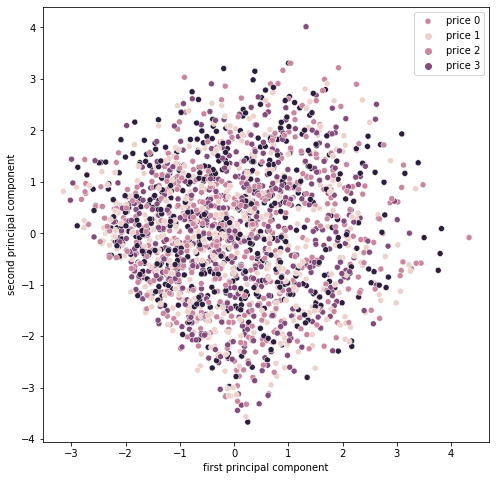

In [18]:
plt.figure(figsize=(8, 8))
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=y)
plt.legend(['price 0', 'price 1', 'price 2', 'price 3'])
plt.xlabel('first principal component')
plt.ylabel('second principal component')

Text(0, 0.5, 'principal components')

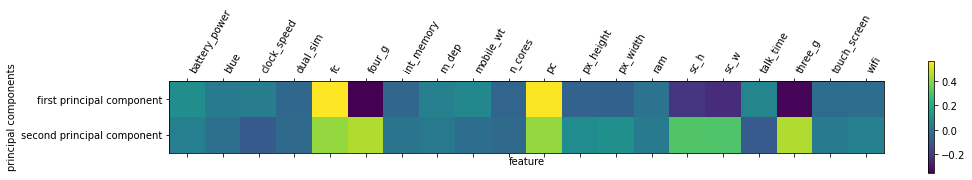

In [19]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['first principal component', 'second principal component'])
plt.colorbar()
plt.xticks(
    range(len(X.columns)),
    X.columns,
    rotation=60,
    ha='left'
)
plt.xlabel('feature')
plt.ylabel('principal components')

In [20]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
print('Original data shape:', X_scaled.shape)
print('decomposed data shape:', X_pca.shape)

Original data shape: (2000, 20)
decomposed data shape: (2000, 5)


Text(0, 0.5, 'principal components')

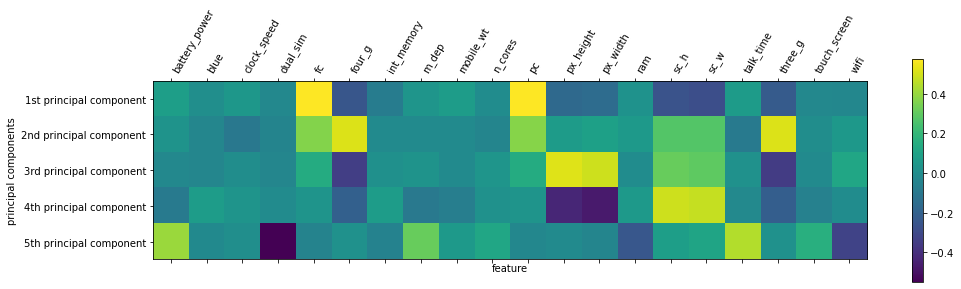

In [21]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks(
    [0, 1, 2, 3, 4],
    [
        '1st principal component',
        '2nd principal component',
        '3rd principal component',
        '4th principal component',
        '5th principal component'
    ]
)
plt.colorbar()
plt.xticks(
    range(len(X.columns)),
    X.columns,
    rotation=60,
    ha='left'
)
plt.xlabel('feature')
plt.ylabel('principal components')

##### t-SNE

In [22]:
tsne = TSNE(random_state=0)
X_tsne = tsne.fit_transform(X)
X_tsne.shape

(2000, 2)

Text(0, 0.5, 't-SNE feature 1')

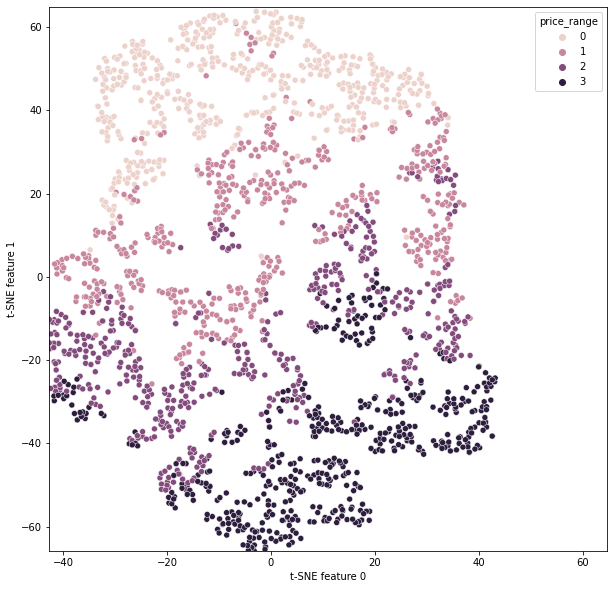

In [23]:
plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 1].max() + 1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=y)
plt.xlabel('t-SNE feature 0')
plt.ylabel('t-SNE feature 1')